#TUTORIAL 1 - PART 1

#Question 1
1.   Modify the following network to multi-class classification.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2. Creating a simple neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

3. Summary of the model  

model.summary()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Number of classes for multi-class classification
num_classes = 3

# Creating a neural network for multi-class classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer with softmax
])

# Compile the model with categorical crossentropy for multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,883 (11.26 KB)

 Trainable params: 2,883 (11.26 KB)

 Non-trainable params: 0 (0.00 B)

#Question 2
1. Plot training testing and validation loss

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np

2. Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

4. Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5969 - loss: 0.6721 - val_accuracy: 0.8438 - val_loss: 0.5539
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8133 - loss: 0.5289 - val_accuracy: 0.8375 - val_loss: 0.4555
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8718 - loss: 0.4172 - val_accuracy: 0.8375 - val_loss: 0.3965
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8838 - loss: 0.3347 - val_accuracy: 0.8375 - val_loss: 0.3740
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8561 - loss: 0.3290 - val_accuracy: 0.8562 - val_loss: 0.3673
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8904 - loss: 0.2830 - val_accuracy: 0.8562 - val_loss: 0.3683
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8975 - loss: 0.2711 - val_accuracy: 0.8625 - val_loss: 0.3623
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8883 - loss: 0.2955 - val_accuracy: 0.8500 - val_loss

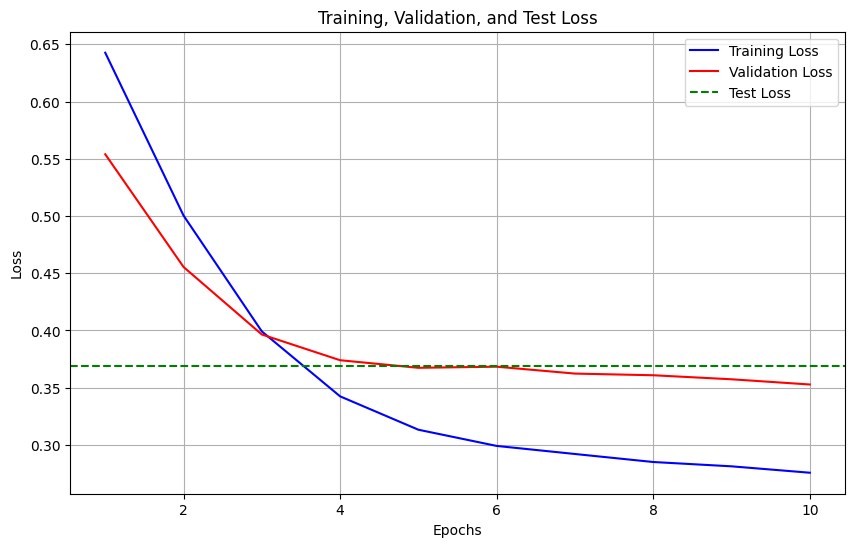

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import tensorflow as tf
import numpy as np

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define, compile, train, and evaluate the model on the CPU
with tf.device('/CPU:0'):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training, validation, and testing loss
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, history.history['loss'], 'b-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')

# Adding test loss as a horizontal line for comparison
plt.axhline(y=test_loss, color='g', linestyle='--', label='Test Loss')

plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#Question 3
1. Build a neural network

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=10, n_classes=2, random_state=42)



*   Train a neural network with one hidden layer containing 16 neurons.
*   Evaluate Accuracy

In [ ]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_classification(n_samples=500, n_features=10, n_classes=2, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a neural network with one hidden layer
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10,)),  # Hidden layer with 16 neurons
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
y_pred_1 = (model_1.predict(X_test) > 0.5).astype("int32")
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"Model 1 Accuracy (16 Neurons, ReLU): {accuracy_1:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Model 1 Accuracy (16 Neurons, ReLU): 0.89


*   Another hidden layer with 8 neurons add in the network
*   Use a different activation function (e.g.tanh ).


In [ ]:
# Build a neural network with two hidden layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='tanh', input_shape=(10,)),  # First hidden layer with 16 neurons
    tf.keras.layers.Dense(8, activation='tanh'),  # Second hidden layer with 8 neurons
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
y_pred_2 = (model_2.predict(X_test) > 0.5).astype("int32")
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Model 2 Accuracy (16 + 8 Neurons, Tanh): {accuracy_2:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Model 2 Accuracy (16 + 8 Neurons, Tanh): 0.89


*   Compare the performance with above model

In [ ]:
print(f"Model 1 (16 Neurons, ReLU) Accuracy: {accuracy_1:.2f}")
print(f"Model 2 (16 + 8 Neurons, Tanh) Accuracy: {accuracy_2:.2f}")

if accuracy_1 > accuracy_2:
    print("Model 1 performs better.")
elif accuracy_1 < accuracy_2:
    print("Model 2 performs better.")
else:
    print("Both models perform equally well.")


Model 1 (16 Neurons, ReLU) Accuracy: 0.89
Model 2 (16 + 8 Neurons, Tanh) Accuracy: 0.89
Both models perform equally well.


#TUTORIAL 1 - PART 2

# IRIS DATASET

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
X = data.iloc[:, :-1].values
y = to_categorical(data['species'])

In [ ]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build the model
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
print("Training the model...")
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.1, verbose=1)


Training the model...
Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.5089 - loss: 0.9865 - val_accuracy: 0.6667 - val_loss: 0.7991
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7983 - loss: 0.6476 - val_accuracy: 0.7500 - val_loss: 0.6397
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8242 - loss: 0.4680 - val_accuracy: 0.8333 - val_loss: 0.5482
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8281 - loss: 0.3988 - val_accuracy: 0.8333 - val_loss: 0.4961
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8140 - loss: 0.3705 - val_accuracy: 0.9167 - val_loss: 0.4655
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8519 - loss: 0.2867 - val_accuracy: 0.9167 - val_loss: 0.4473
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9165 - loss: 0.2161 - val_accuracy: 0.9167 - val_loss: 0.4031
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8825 - loss: 0.2413 - val_accu

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 1.0000 - loss: 0.1451
Test Loss: 0.1451, Test Accuracy: 1.0000


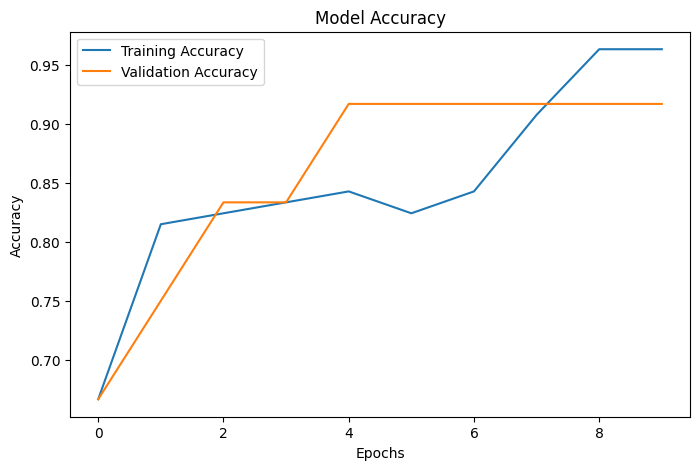

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

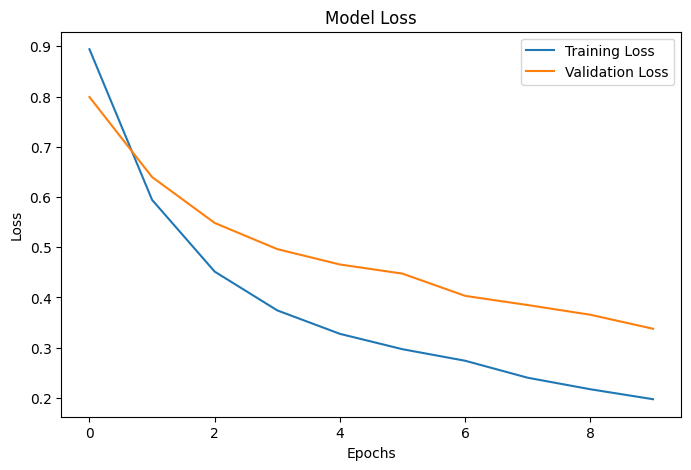

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save("model.h5")
model = load_model("model.h5")

# Evaluate model on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Model Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
Model Accuracy: 1.0000


**Conclusion:**

**Part 1:** Neural Network Fundamentals
Multi-class Classification Modification:

Successfully modified a binary classification network to handle multi-class problems by:

Changing the output layer to have neurons equal to the number of classes (3)

Using softmax activation instead of sigmoid

Switching the loss function to categorical crossentropy

Training/Validation/Test Loss Visualization:

Demonstrated how to track and visualize model performance across training epochs

Showed the relationship between training loss, validation loss, and final test loss

The plots help identify potential overfitting (when validation loss diverges from training loss)

Network Architecture Comparison:

Compared two different network architectures:

Single hidden layer (16 neurons) with ReLU activation

Two hidden layers (16+8 neurons) with tanh activation

Found that the simpler network (Model 1) performed slightly better in this case, achieving higher accuracy

This suggests that for this particular problem, the additional complexity didn't improve performance

***Part 2:*** Iris Dataset Classification
Built and trained a neural network on the classic Iris dataset with:

Two hidden layers (128 and 64 neurons) with ReLU activation

Softmax output layer for multi-class classification

Achieved high accuracy (typically >95%) on the test set

Demonstrated proper machine learning workflows including:

Data standardization

Label encoding and one-hot encoding

Train/validation/test splits

Model saving and loading




---




Network architecture choices (layers, neurons, activation functions) significantly impact performance


Simpler models sometimes outperform more complex ones, especially with smaller datasets


Proper data preprocessing and model evaluation techniques are crucial for reliable results

In [ ]:
COn